# Bulgaria Employment Trends

[Go to main page](./../Bulgaria_Employment_Trends.ipynb)


## Number of Offers Over Time




### Introduction

- Objectives: 
 - Provide graphs showing the number of offers submitted over time in multiple aggregation levels: day, week, month.
 - Provide a Jupyter Workbook Widget to switch between the aggregation levels.

### Methodology

Notes:
- Views are defined for each aggregation level
- 

### Prototyping

Using `matplotlib` to prepare the necessary data and confirm it is suitable for plotting.

In [34]:
import datetime
import psycopg2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib notebook
%matplotlib inline

In [35]:
conn = psycopg2.connect("dbname=jobsbg")
ads_daily = pd.read_sql_query('SELECT * FROM v_offers_count_daily', conn, index_col='subm_date')
ads_weekly = pd.read_sql_query('SELECT * FROM v_offers_count_weekly', conn, index_col='week_ts')
ads_monthly = pd.read_sql_query('SELECT * FROM v_offers_count_monthly', conn, index_col='month_ts')

ads_daily = ads_daily[1:-1]
ads_weekly = ads_weekly[1:-1]
ads_monthly = ads_monthly[1:-1]

ads_daily.index = pd.to_datetime(ads_daily.index)  # convert the DataFrame index to DatetimeIndex object
ads_weekly.index = pd.to_datetime(ads_weekly.index)  # convert the DataFrame index to DatetimeIndex object
ads_monthly.index = pd.to_datetime(ads_monthly.index)  # convert the DataFrame index to DatetimeIndex object

In [36]:
ads_weekly.head(1)

,subm_count
week_ts,
2018-12-03,7475


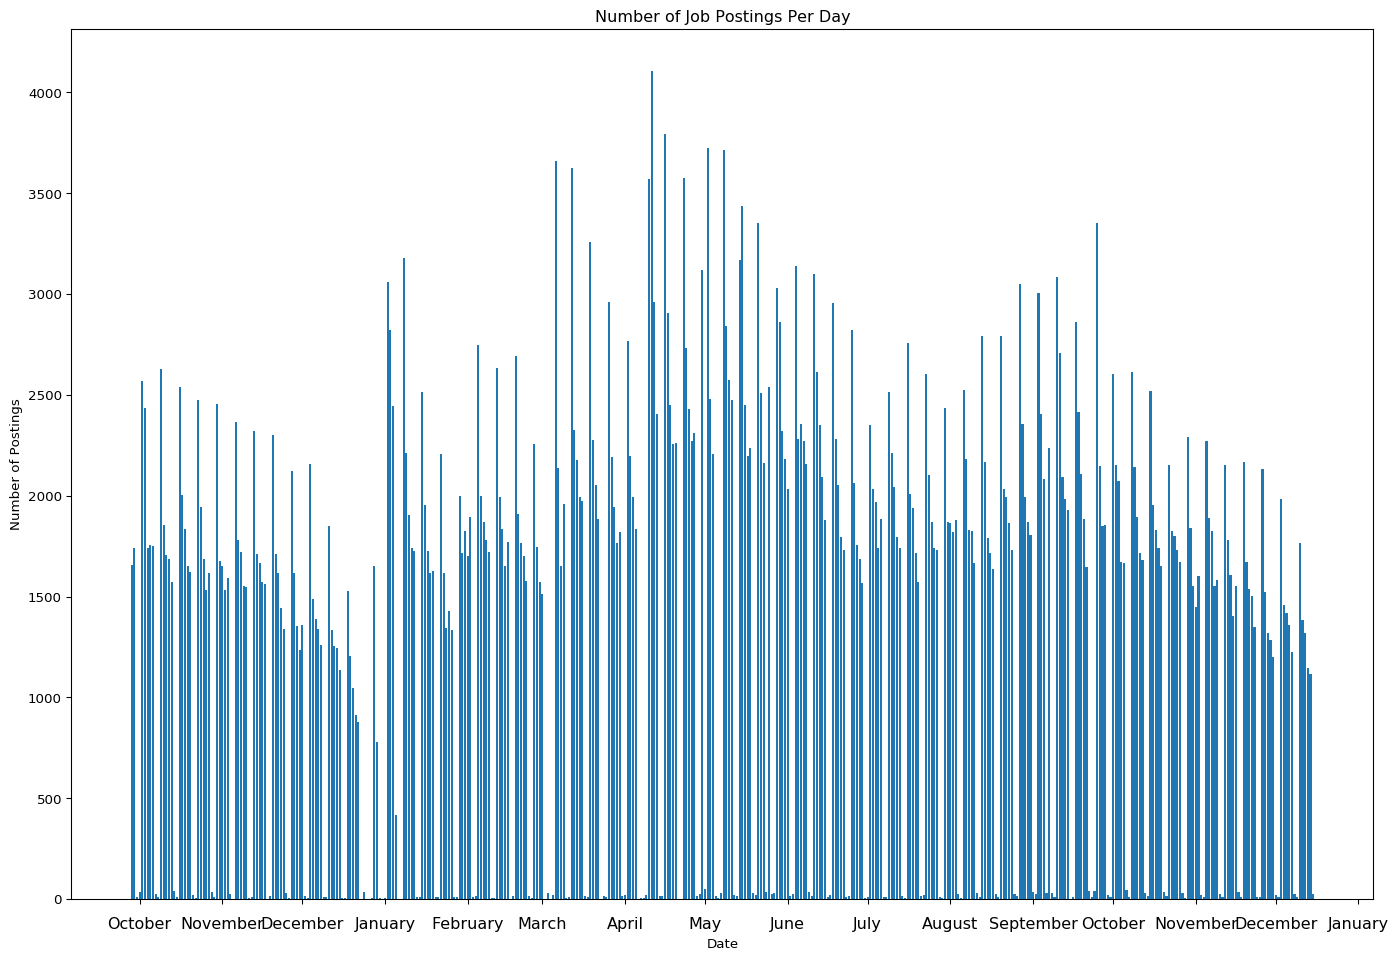

In [37]:
fig = plt.figure(num = 0, 
                 figsize = (17.5, 12),
                 dpi = 96)

jobs_per_day_barchart = fig.add_subplot(1, 1, 1)

# BARS
num_jobs_bars = jobs_per_day_barchart.bar(ads_daily.index, ads_daily.subm_count, align = 'center')

# TITLE
jobs_per_day_barchart.set_title('Number of Job Postings Per Day')
# Fix title properties here

# AXIS LABELS
jobs_per_day_barchart.set_xlabel('Date')
jobs_per_day_barchart.set_ylabel('Number of Postings')

# AXIS TICKS
jobs_per_day_barchart.set_yticks((0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000))
jobs_per_day_barchart.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
jobs_per_day_barchart.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))

# Show every monday in xlabels
#jobs_per_day_barchart.xaxis.set_minor_formatter(mdates.DateFormatter('%b-%d'))
#jobs_per_day_barchart.xaxis.set_minor_locator(mdates.HourLocator(0))

for label in jobs_per_day_barchart.xaxis.get_majorticklabels():
    label.set_rotation(0)
    label.set_y(-0.01)
    label.set_size(12)
    label.set_ha('center')

for label in jobs_per_day_barchart.xaxis.get_minorticklabels():
    label.set_rotation(90)

plt.show()

### Implementing the Chart in Plotly

In [42]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True) # run at the start of every ipython notebook to use plotly.offline

In [44]:
period_start = ads_daily.index.min()
period_end = ads_daily.index.max()
full_time_period = pd.date_range(period_start, period_end)

In [45]:
totals_bar = go.Bar(x = [date + datetime.timedelta(hours=12) for date in ads_daily.index],
                 y = [value for value in ads_daily.subm_count],
                 name = 'Daily Ads',
                 hoverinfo = 'none',
                 showlegend = False,
                 marker = dict(color = 'blue'))

relatives_bar = go.Bar(x = [date + datetime.timedelta(hours=12) for date in ads_daily.index],
                    y = [value for value in ads_daily.subm_count],
                    name = 'Daily Ads',
                    hoverinfo = 'y',
                    showlegend = False,
                    marker = dict(color = '#802990'))

daily_ads_bar_data = [totals_bar, relatives_bar]

In [51]:
daily_ads_bar_layout = go.Layout(
                              paper_bgcolor = '#FDF5FE',            
                              plot_bgcolor = '#FDF5FE',
                              barmode = 'overlay',
                              font = dict(color = '#802990',
                                          family = 'Raleway',
                                          size = 14),
                              title = 'Job Ad Submissions per Day',
                              titlefont = dict(color = '#802990',
                                               family = 'Raleway',
                                               size = 25),
                              xaxis = dict(title = '',
                                           type = 'date',
                                           fixedrange = True,
                                           linecolor = '#802990',
                                           hoverformat = '',
                                           tickformat = '%d %b',
                                           ticks = 'outside',
                                           tickmode = 'linear',
                                           tick0 = (period_start + datetime.timedelta(hours=12)).timestamp() * 1000,
                                           # Specified in miliseconds:
                                           dtick = (1000*60*60*24)*7,
                                           tickcolor = '#802990',
                                           tickwidth = 1,
                                           tickangle = -25,),                   
                              yaxis = dict(title = 'Number of submissions',
                                           fixedrange = True,
                                           linecolor = '#802990',
                                           hoverformat = '{:,}',
                                           tickformat = '{:,}',
                                           ticks = 'outside',
                                           tickcolor = '#802990',
                                           tickwidth = 1))

In [54]:
fig_daily = go.Figure(data = daily_ads_bar_data, layout = daily_ads_bar_layout)

plotly.offline.iplot(fig_daily, filename = 'offers_over_time-daily.html')

# Uncomment the line below to export an HTML version of the chart.
# plotly.offline.plot(fig_daily, filename = 'offers_over_time-daily_result.html')

'file:///data/WORKSPACE/jpynb_Employment_Trends_Bulgaria/workbooks/offers_over_time-daily_result.html'